# Lesson 2: Sequential Chats and Customer Onboarding
(客户入职聊天)

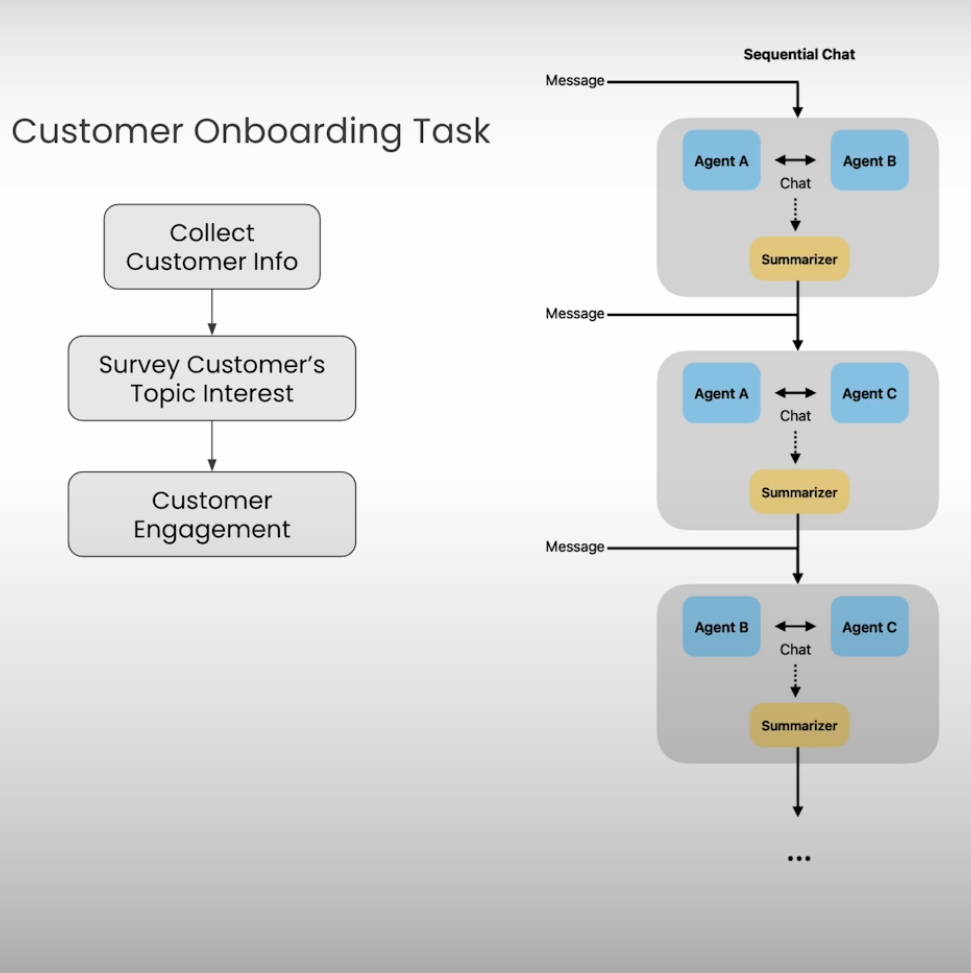

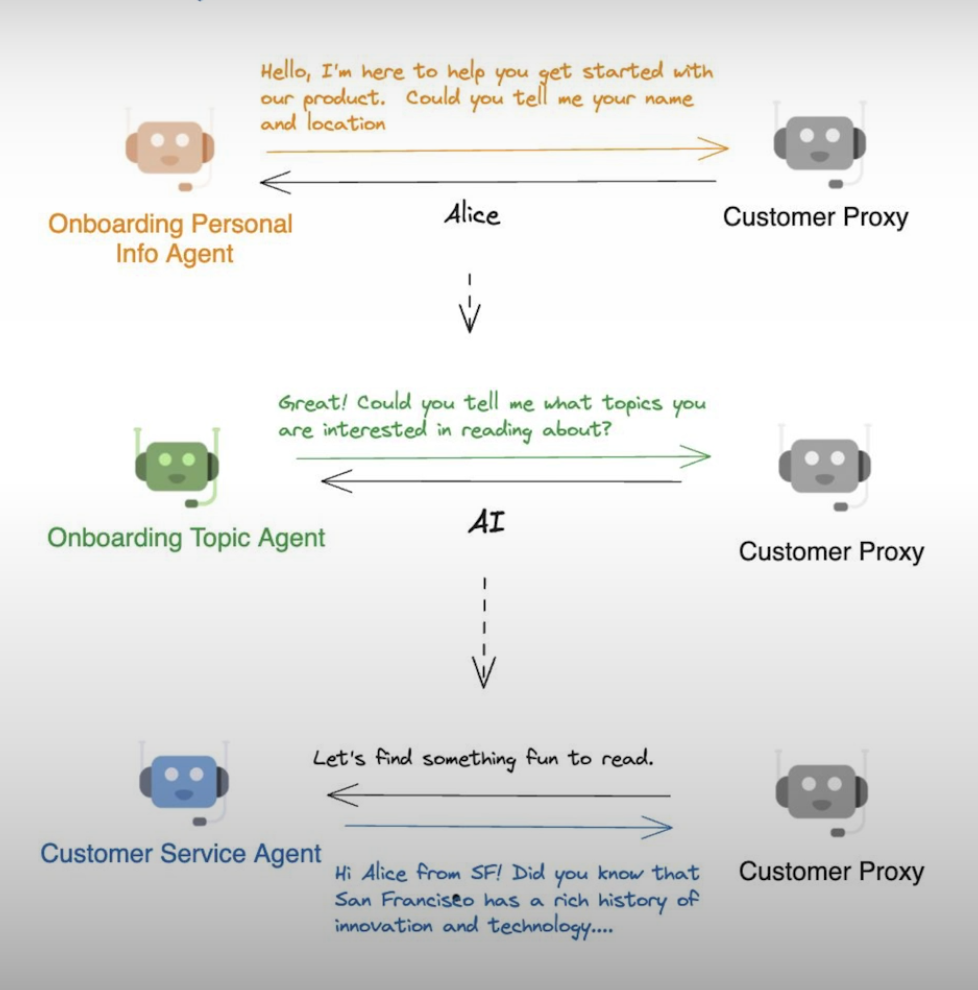

## Setup

In [1]:
llm_config={"model": "gpt-3.5-turbo"}

In [2]:
from autogen import ConversableAgent

## Creating the needed agents (创建所需要的agent 对象)

In [31]:
# 创建入职个人信息agent 去询问个人信息
onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding Personal Information Agent",
    system_message='''你是一名乐于助人的客户入职代理人，
    你要帮助新客户顺利开始使用我们的产品。
    你的任务是分步集客户的姓名和家庭住址这两个个人信息。
    不要询问其他信息。
    收集完所有信息后，返回 "TERMINATE"。''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)
# onboarding_personal_information_agent = ConversableAgent(
#     name="Onboarding Personal Information Agent",
#     system_message='''You are a helpful customer onboarding agent,
#     you are here to help new customers get started with our product.
#     Your job is to gather customer's name and location.
#     Do not ask for other information. Return 'TERMINATE' 
#     when you have gathered all the information.''',
#     llm_config=llm_config,
#     code_execution_config=False,
#     human_input_mode="NEVER",
# )

In [32]:
# 创建入职新闻主题爱好agent 去询问新闻主题爱好
onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding Topic preference Agent",
    system_message='''你是一名乐于助人的客户入职代理人，
    你要帮助新客户顺利开始使用我们的产品。
    你的任务是收集客户对新闻主题的偏好。
    不要询问其他信息。
    收集完所有信息后，请返回 "TERMINATE"。''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)
# onboarding_topic_preference_agent = ConversableAgent(
#     name="Onboarding Topic preference Agent",
#     system_message='''You are a helpful customer onboarding agent,
#     you are here to help new customers get started with our product.
#     Your job is to gather customer's preferences on news topics.
#     Do not ask for other information.
#     Return 'TERMINATE' when you have gathered all the information.''',
#     llm_config=llm_config,
#     code_execution_config=False,
#     human_input_mode="NEVER",
# )

In [33]:
# 创建入职新闻主题爱好agent 去询问新闻主题爱好
customer_engagement_agent = ConversableAgent(
    name="Customer Engagement Agent",
    system_message='''你是一位乐于助人的客户服务人员，
    你要根据客户的个人信息和主题偏好为客户提供乐趣。
    这可以包括有趣的事实、笑话或有意思的故事。
    必须要具有吸引力和趣味性！
    完成后返回'TERMINATE'。''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

# customer_engagement_agent = ConversableAgent(
#     name="Customer Engagement Agent",
#     system_message='''You are a helpful customer service agent
#     here to provide fun for the customer based on the user's
#     personal information and topic preferences.
#     This could include fun facts, jokes, or interesting stories.
#     Make sure to make it engaging and fun!
#     Return 'TERMINATE' when you are done.''',
#     llm_config=llm_config,
#     code_execution_config=False,
#     human_input_mode="NEVER",
#     is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
# )

In [34]:
#创建一个真实客户的代理（proxy 代表，代理，代理人）
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",# 这里会征求真实客户的输入
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

## Creating tasks

Now, you can craft a series of tasks to facilitate the onboarding process.  
（现在可以制定一系列任务来促进入职流程。）

In [35]:
# chats = [
#     {
#         "sender": onboarding_personal_information_agent,
#         "recipient": customer_proxy_agent,
#         "message": 
#             "Hello, I'm here to help you get started with our product."
#             "Could you tell me your name and location?",
#         "summary_method": "reflection_with_llm",
#         "summary_args": {
#             "summary_prompt" : "Return the customer information "
#                              "into as JSON object only: "
#                              "{'name': '', 'location': ''}",
#         },
#         "max_turns": 2,
#         "clear_history" : True
#     },
#     {
#         "sender": onboarding_topic_preference_agent,
#         "recipient": customer_proxy_agent,
#         "message": 
#                 "Great! Could you tell me what topics you are "
#                 "interested in reading about?",
#         "summary_method": "reflection_with_llm",
#         "max_turns": 1,
#         "clear_history" : False
#     },
#     {
#         "sender": customer_proxy_agent,
#         "recipient": customer_engagement_agent,
#         "message": "Let's find something fun to read.",
#         "max_turns": 1,
#         "summary_method": "reflection_with_llm",
#     },
# ]

在每一论对话（chat）中， sender 发送一个初始化句子给recipient ，开启对话
然后它们之间来回进行对话直到最大轮数（max_turns）或者终止信号被检测到对话就会结束

In [36]:
# 三轮对话对应一开始分解的三个任务
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message": 
            "您好，我是来帮助您开始使用我们的产品的。"
            "能告诉我您的姓名和家庭住址吗？",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt" : "仅以 JSON 对象形式返回客户信息: "
                             "{'姓名': '', '家庭住址': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": "ok！能告诉我您对哪些主题感兴趣吗？",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "让我们找点有意思的东西来读吧。",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

## Start the onboarding process

**Note**: You might get a slightly different response than what's shown in the video. Feel free to try different inputs, such as name, location, and preferences.

In [37]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Personal Information Agent (to customer_proxy_agent):

您好，我是来帮助您开始使用我们的产品的。能告诉我您的姓名和家庭住址吗？

--------------------------------------------------------------------------------
Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 大王
customer_proxy_agent (to Onboarding Personal Information Agent):

大王

--------------------------------------------------------------------------------
Onboarding Personal Information Agent (to customer_proxy_agent):

感谢您的回答。请问您的家庭住址是什么呢？

--------------------------------------------------------------------------------
Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: 上海，静安
customer_proxy_agent 

---

# 用英文试一下

In [40]:
onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding Personal Information Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's name and location.
    Do not ask for other information. Return 'TERMINATE' 
    when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [41]:
onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding Topic preference Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's preferences on news topics.
    Do not ask for other information.
    Return 'TERMINATE' when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [42]:
customer_engagement_agent = ConversableAgent(
    name="Customer Engagement Agent",
    system_message='''You are a helpful customer service agent
    here to provide fun for the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [43]:
#创建一个真实客户的代理（proxy 代表，代理，代理人）
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",# 这里会征求真实客户的输入
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [44]:
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message": 
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {
            "summary_prompt" : "Return the customer information "
                             "into as JSON object only: "
                             "{'name': '', 'location': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": 
                "Great! Could you tell me what topics you are "
                "interested in reading about?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "Let's find something fun to read.",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

In [45]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Personal Information Agent (to customer_proxy_agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------
Provide feedback to Onboarding Personal Information Agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: wws
customer_proxy_agent (to Onboarding Personal Information Agent):

wws

--------------------------------------------------------------------------------
Onboarding Personal Information Agent (to customer_proxy_agent):

I'm sorry, I didn't quite catch that. Could you please provide me with your name and location to get started?

--------------------------------------------------------------------------------
Provide feed

!!!英语可以，中文不太行！！看来还需要继续研究下

---

## Print out the summary

In [46]:
for chat_result in chat_results:
    print(chat_result.summary)
    print("\n")

{'name': 'wws', 'location': '上海，静安'}


riding


The suggestion is to explore fascinating facts about different modes of transportation around the world, from bullet trains in Japan to gondolas in Venice, as something fun to read about riding.




## Print out the cost

In [39]:
for chat_result in chat_results:
    print(chat_result.cost)
    print("\n")

{'usage_including_cached_inference': {'total_cost': 0.000232, 'gpt-3.5-turbo-0125': {'cost': 0.000232, 'prompt_tokens': 266, 'completion_tokens': 66, 'total_tokens': 332}}, 'usage_excluding_cached_inference': {'total_cost': 0.000232, 'gpt-3.5-turbo-0125': {'cost': 0.000232, 'prompt_tokens': 266, 'completion_tokens': 66, 'total_tokens': 332}}}


{'usage_including_cached_inference': {'total_cost': 7.300000000000001e-05, 'gpt-3.5-turbo-0125': {'cost': 7.300000000000001e-05, 'prompt_tokens': 101, 'completion_tokens': 15, 'total_tokens': 116}}, 'usage_excluding_cached_inference': {'total_cost': 7.300000000000001e-05, 'gpt-3.5-turbo-0125': {'cost': 7.300000000000001e-05, 'prompt_tokens': 101, 'completion_tokens': 15, 'total_tokens': 116}}}


{'usage_including_cached_inference': {'total_cost': 0.0006410000000000001, 'gpt-3.5-turbo-0125': {'cost': 0.0006410000000000001, 'prompt_tokens': 517, 'completion_tokens': 255, 'total_tokens': 772}}, 'usage_excluding_cached_inference': {'total_cost': 0.0